**Instalando a biblioteca pandera para a validação de dados**

In [ ]:
pip install pandera

     |████████████████████████████████| 191 kB 5.1 MB/s 


**Importação das bibliotecas necessárias**

In [ ]:
import pandas as pd
from google.cloud import storage

**montando o google drive para acessar ao dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Abrindo o dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projeto-aprimoramento-wander/7.csv - 7.csv.csv')
df.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1011,52,52,0
1,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1012,74,74,0
2,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1013,32,28,4
3,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1014,17,16,1
4,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1015,47,46,1


**visualização das informações das ultimas linhas do dataframe**

In [ ]:
df.tail()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
2299,26,PRESIDÊNCIA DA REPÚBLICA,PR,1408,VICE-PRESIDÊNCIA DA REPÚBLICA,VPR,PRESIDÊNCIA DA REPÚBLICA,PR,202110,FCP1015,3,3,0
2300,26,PRESIDÊNCIA DA REPÚBLICA,PR,1408,VICE-PRESIDÊNCIA DA REPÚBLICA,VPR,PRESIDÊNCIA DA REPÚBLICA,PR,202110,FCP1022,4,4,0
2301,26,PRESIDÊNCIA DA REPÚBLICA,PR,1408,VICE-PRESIDÊNCIA DA REPÚBLICA,VPR,PRESIDÊNCIA DA REPÚBLICA,PR,202110,FCP1024,8,8,0
2302,26,PRESIDÊNCIA DA REPÚBLICA,PR,1408,VICE-PRESIDÊNCIA DA REPÚBLICA,VPR,PRESIDÊNCIA DA REPÚBLICA,PR,202110,NE 0001,1,1,0
2303,26,PRESIDÊNCIA DA REPÚBLICA,PR,1408,VICE-PRESIDÊNCIA DA REPÚBLICA,VPR,PRESIDÊNCIA DA REPÚBLICA,PR,202110,VPR0001,1,1,0


**Verificando as informações do dataframe**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   orgao_superior_codigo_siorg  2304 non-null   int64 
 1   orgao_superior_nome          2304 non-null   object
 2   orgao_superior_sigla         2304 non-null   object
 3   orgao_codigo_siorg           2304 non-null   int64 
 4   orgao_nome                   2304 non-null   object
 5   orgao_sigla                  2304 non-null   object
 6   orgao_como_no_raiox_nome     2304 non-null   object
 7   orgao_como_no_raiox_sigla    2304 non-null   object
 8   ano_mes_referencia           2304 non-null   int64 
 9   sigla_codigo_cargo_comissao  2304 non-null   object
 10  cargos_distribuidos          2304 non-null   int64 
 11  cargos_ocupados              2304 non-null   int64 
 12  cargos_vagos                 2304 non-null   int64 
dtypes: int64(6), object(7)
memory usa

**Análise para identificar se há algumas inconsistências**

In [ ]:
df.isnull()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,False,False,False,False,False,False,False,False,False,False,False,False,False
2300,False,False,False,False,False,False,False,False,False,False,False,False,False
2301,False,False,False,False,False,False,False,False,False,False,False,False,False
2302,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe(include="all")

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
count,2304.000000,2304,2304,2304.000000,2304,2304,2304,2304,2304.0,2304,2304.000000,2304.000000,2304.000000
unique,NaN,20,20,NaN,178,178,176,176,NaN,88,NaN,NaN,NaN
top,NaN,MINISTÉRIO DA EDUCAÇÃO,MEC,NaN,COMANDO DA AERONAUTICA,C.AER,MINISTÉRIO DA DEFESA,MD,NaN,FG 0002,NaN,NaN,NaN
freq,NaN,935,935,NaN,66,66,85,85,NaN,109,NaN,NaN,NaN
mean,61528.272569,NaN,NaN,48492.219618,NaN,NaN,NaN,NaN,202110.0,NaN,40.003472,36.846354,3.157118
std,98272.700533,NaN,NaN,75271.188243,NaN,NaN,NaN,NaN,0.0,NaN,89.955820,79.228147,18.720481
min,14.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,202110.0,NaN,1.000000,1.000000,-90.000000
25%,244.000000,NaN,NaN,322.000000,NaN,NaN,NaN,NaN,202110.0,NaN,4.000000,3.000000,0.000000
50%,304.000000,NaN,NaN,1799.000000,NaN,NaN,NaN,NaN,202110.0,NaN,14.000000,13.000000,0.000000
75%,72084.000000,NaN,NaN,94427.000000,NaN,NaN,NaN,NaN,202110.0,NaN,43.000000,41.000000,2.000000


In [ ]:
df.isna().sum()

orgao_superior_codigo_siorg    0
orgao_superior_nome            0
orgao_superior_sigla           0
orgao_codigo_siorg             0
orgao_nome                     0
orgao_sigla                    0
orgao_como_no_raiox_nome       0
orgao_como_no_raiox_sigla      0
ano_mes_referencia             0
sigla_codigo_cargo_comissao    0
cargos_distribuidos            0
cargos_ocupados                0
cargos_vagos                   0
dtype: int64

**quantidade de linhas e colunas do dataframe**

In [ ]:
df.shape

(2304, 13)

**Verificando se há valores únicos nas colunas**

In [ ]:
sorted(pd.unique(df['orgao_superior_nome']))

['ADVOCACIA-GERAL DA UNIÃO',
 'CONTROLADORIA-GERAL DA UNIÃO',
 'MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECIMENTO',
 'MINISTÉRIO DA CIDADANIA',
 'MINISTÉRIO DA CIÊNCIA, TECNOLOGIA E INOVAÇÕES',
 'MINISTÉRIO DA DEFESA',
 'MINISTÉRIO DA ECONOMIA',
 'MINISTÉRIO DA EDUCAÇÃO',
 'MINISTÉRIO DA INFRAESTRUTURA',
 'MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA',
 'MINISTÉRIO DA MULHER, DA FAMÍLIA E DOS DIREITOS HUMANOS',
 'MINISTÉRIO DA SAÚDE',
 'MINISTÉRIO DAS COMUNICAÇÕES',
 'MINISTÉRIO DAS RELAÇÕES EXTERIORES',
 'MINISTÉRIO DE MINAS E ENERGIA',
 'MINISTÉRIO DO DESENVOLVIMENTO REGIONAL',
 'MINISTÉRIO DO MEIO AMBIENTE',
 'MINISTÉRIO DO TRABALHO E PREVIDÊNCIA',
 'MINISTÉRIO DO TURISMO',
 'PRESIDÊNCIA DA REPÚBLICA']

In [ ]:
sorted(pd.unique(df['orgao_nome']))

['ADVOCACIA-GERAL DA UNIÃO',
 'AGÊNCIA ESPACIAL BRASILEIRA',
 'AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL',
 'AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA',
 'AGÊNCIA NACIONAL DE MINERAÇÃO',
 'AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR',
 'AGÊNCIA NACIONAL DE TELECOMUNICAÇÕES',
 'AGÊNCIA NACIONAL DE TRANSPORTES AQUAVIÁRIOS',
 'AGÊNCIA NACIONAL DE TRANSPORTES TERRESTRES',
 'AGÊNCIA NACIONAL DE VIGILÂNCIA SANITÁRIA',
 'AGÊNCIA NACIONAL DE ÁGUAS',
 'AGÊNCIA NACIONAL DO CINEMA',
 'AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS',
 'BANCO CENTRAL DO BRASIL',
 'CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO SUCKOW DA FONSECA',
 'CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINAS GERAIS',
 'COLÉGIO PEDRO II',
 'COMANDO DA AERONAUTICA',
 'COMANDO DA MARINHA',
 'COMANDO DO EXERCITO',
 'COMISSÃO DE VALORES MOBILIÁRIOS',
 'COMISSÃO NACIONAL DE ENERGIA NUCLEAR',
 'CONSELHO ADMINISTRATIVO DE DEFESA ECONÔMICA',
 'CONSELHO NACIONAL DE DESENVOLVIMENTO CIENTÍFICO E TECNOLÓGICO',
 'CONTROLADORIA-GERAL DA UNIÃO',
 'DEP

In [ ]:
sorted(pd.unique(df['orgao_como_no_raiox_nome']))

['ADVOCACIA-GERAL DA UNIÃO',
 'AGÊNCIA ESPACIAL BRASILEIRA',
 'AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL',
 'AGÊNCIA NACIONAL DE ENERGIA ELÉTRICA',
 'AGÊNCIA NACIONAL DE MINERAÇÃO',
 'AGÊNCIA NACIONAL DE SAÚDE SUPLEMENTAR',
 'AGÊNCIA NACIONAL DE TELECOMUNICAÇÕES',
 'AGÊNCIA NACIONAL DE TRANSPORTES AQUAVIÁRIOS',
 'AGÊNCIA NACIONAL DE TRANSPORTES TERRESTRES',
 'AGÊNCIA NACIONAL DE VIGILÂNCIA SANITÁRIA',
 'AGÊNCIA NACIONAL DE ÁGUAS',
 'AGÊNCIA NACIONAL DO CINEMA',
 'AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS',
 'BANCO CENTRAL DO BRASIL',
 'CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA CELSO SUCKOW DA FONSECA',
 'CENTRO FEDERAL DE EDUCAÇÃO TECNOLÓGICA DE MINAS GERAIS',
 'COLÉGIO PEDRO II',
 'COMANDO DA AERONAUTICA',
 'COMANDO DA MARINHA',
 'COMANDO DO EXERCITO',
 'COMISSÃO DE VALORES MOBILIÁRIOS',
 'COMISSÃO NACIONAL DE ENERGIA NUCLEAR',
 'CONSELHO ADMINISTRATIVO DE DEFESA ECONÔMICA',
 'CONSELHO NACIONAL DE DESENVOLVIMENTO CIENTÍFICO E TECNOLÓGICO',
 'CONTROLADORIA-GERAL DA UNIÃO',
 'DEP

In [ ]:
sorted(pd.unique(df['orgao_superior_codigo_siorg']))

[14,
 26,
 46,
 244,
 263,
 304,
 1927,
 1988,
 2846,
 2852,
 41066,
 72084,
 214460,
 219925,
 235874,
 235876,
 235880,
 235881,
 264359,
 276368]

In [ ]:
sorted(pd.unique(df['orgao_superior_sigla']))

['AGU',
 'CGU',
 'MAPA',
 'MCIDADANIA',
 'MCOM',
 'MCTI',
 'MD',
 'MDR',
 'ME',
 'MEC',
 'MINFRA',
 'MJSP',
 'MMA',
 'MME',
 'MMFDH',
 'MRE',
 'MS',
 'MTP',
 'MTUR',
 'PR']

In [ ]:
sorted(pd.unique(df['ano_mes_referencia']))

[202110]

In [ ]:
sorted(pd.unique(df['sigla_codigo_cargo_comissao']))

['CA 0001',
 'CA 0002',
 'CA 0003',
 'CAS0001',
 'CAS0002',
 'CCD0001',
 'CCD0002',
 'CCT0001',
 'CCT0002',
 'CCT0003',
 'CCT0004',
 'CCT0005',
 'CD 0001',
 'CD 0002',
 'CD 0003',
 'CD 0004',
 'CGE0001',
 'CGE0002',
 'CGE0003',
 'CGE0004',
 'DAS1011',
 'DAS1012',
 'DAS1013',
 'DAS1014',
 'DAS1015',
 'DAS1016',
 'DAS1021',
 'DAS1022',
 'DAS1023',
 'DAS1024',
 'DAS1025',
 'DAS1026',
 'DAS1031',
 'DAS1032',
 'DAS1033',
 'DAS1034',
 'DAS1035',
 'FCC0001',
 'FCP1011',
 'FCP1012',
 'FCP1013',
 'FCP1014',
 'FCP1015',
 'FCP1016',
 'FCP1021',
 'FCP1022',
 'FCP1023',
 'FCP1024',
 'FCP1025',
 'FCP1031',
 'FCP1032',
 'FCP1033',
 'FCP1034',
 'FCP1035',
 'FCP1041',
 'FCP1042',
 'FCP1043',
 'FCP1044',
 'FCT0001',
 'FCT0002',
 'FCT0003',
 'FCT0004',
 'FCT0005',
 'FCT0006',
 'FCT0007',
 'FCT0008',
 'FCT0009',
 'FCT0010',
 'FCT0011',
 'FCT0012',
 'FCT0013',
 'FCT0014',
 'FCT0015',
 'FG 0001',
 'FG 0002',
 'FG 0003',
 'FG 0004',
 'FG 0005',
 'FG 0006',
 'FG 0007',
 'FG 0008',
 'FGR0001',
 'FGR0002',
 'FG

In [ ]:
df.loc[229]

orgao_superior_codigo_siorg                     41066
orgao_superior_nome              MINISTÉRIO DA DEFESA
orgao_superior_sigla                               MD
orgao_codigo_siorg                                 48
orgao_nome                     COMANDO DA AERONAUTICA
orgao_sigla                                     C.AER
orgao_como_no_raiox_nome       COMANDO DA AERONAUTICA
orgao_como_no_raiox_sigla                       C.AER
ano_mes_referencia                             202110
sigla_codigo_cargo_comissao                   DAS1012
cargos_distribuidos                                13
cargos_ocupados                                    13
cargos_vagos                                        0
Name: 229, dtype: object

**Realizando o backup do dataframe**

In [ ]:
dfbackup = df.copy()
df.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_superior_sigla,orgao_codigo_siorg,orgao_nome,orgao_sigla,orgao_como_no_raiox_nome,orgao_como_no_raiox_sigla,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1011,52,52,0
1,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1012,74,74,0
2,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1013,32,28,4
3,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1014,17,16,1
4,46,ADVOCACIA-GERAL DA UNIÃO,AGU,46,ADVOCACIA-GERAL DA UNIÃO,AGU,ADVOCACIA-GERAL DA UNIÃO,AGU,202110,DAS1015,47,46,1


**Removendo as colunas com dados repitidos ou desnecessários**

In [ ]:
df.drop(['orgao_superior_sigla'], axis=1, inplace=True)
df.drop(['orgao_codigo_siorg'], axis=1, inplace=True)
df.drop(['orgao_como_no_raiox_nome'], axis=1, inplace=True)
df.drop(['orgao_sigla'], axis=1, inplace=True)
df.drop(['orgao_como_no_raiox_sigla'], axis=1, inplace=True)

**Analise depois das dropagem da colunas**

In [ ]:
df.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_nome,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,DAS1011,52,52,0
1,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,DAS1012,74,74,0
2,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,DAS1013,32,28,4
3,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,DAS1014,17,16,1
4,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,DAS1015,47,46,1


**Renomeando os dados da coluna sigla_codigo_cargo_comissao**

In [ ]:
df.sigla_codigo_cargo_comissao.replace(['CA 0001'], ['Comissionado de Assessoria'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CA 0002'], ['Comissionado de Assessoria'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CA 0003'], ['Comissionado de Assessoria'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CAS0001'], ['Cargo Comissionado de Assistência'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CAS0002'], ['Cargo Comissionado de Assistência'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCD0001'], ['Cargo Comissionado de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCD0002'], ['Cargo Comissionado de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCT0001'], ['Cargo Comissionado Técnico'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCT0002'], ['Cargo Comissionado Técnico'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCT0003'], ['Cargo Comissionado Técnico'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCT0004'], ['Cargo Comissionado Técnico'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CCT0005'], ['Cargo Comissionado Técnico'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CD 0001'], ['Cargo de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CD 0002'], ['Cargo de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CD 0003'], ['Cargo de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CD 0004'], ['Cargo de Direção'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CGE0001'], ['Cargo Comissionado de Gerência Executiva'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CGE0002'], ['Cargo Comissionado de Gerência Executiva'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CGE0003'], ['Cargo Comissionado de Gerência Executiva'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['CGE0004'], ['Cargo Comissionado de Gerência Executiva'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1011'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1012'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1013'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1014'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1015'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1016'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1021'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1022'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1023'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1024'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1025'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1026'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1031'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1032'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1033'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1034'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['DAS1035'], ['Direção e Assessoramento Superiores'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCC0001'], ['Função Comissionada de Coordenador de Curso'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1011'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1012'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1013'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1014'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1015'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1016'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1021'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1022'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1023'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1024'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1025'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1031'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1032'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1033'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1034'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1035'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1041'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1042'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1043'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCP1044'], ['Funções Comissionadas do Poder Executivo'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0001'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0002'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0003'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0004'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0005'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0006'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0007'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0008'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0009'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0010'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0011'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0012'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0013'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0014'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FCT0015'], ['Funções Comissionadas Técnicas'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0001'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0002'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0003'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0004'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0005'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0006'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0007'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FG 0008'], ['Função Gratificada Específica de Instituição de Ensino'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FGR0001'], ['Função Gratificada'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FGR0002'], ['Função Gratificada'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['FGR0003'], ['Função Gratificada'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['MES0001'], ['Ministro de Estado'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['NE 0001'], ['Cargo de Natureza Especial'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['PR 0001'], ['Presidente da República'], inplace = True)
df.sigla_codigo_cargo_comissao.replace(['VPR0001'], ['Vice-Presidente da República'], inplace = True)

**Analise do dataframe depois da alteração**

In [ ]:
df.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_nome,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,52,52,0
1,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,74,74,0
2,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,32,28,4
3,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,17,16,1
4,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,47,46,1


In [ ]:
df.shape

(2304, 8)

**Salvando o arquivo tratado**

In [ ]:
df.to_csv('df_tratado.csv', index=False)

**Plotagem com matplotlib**

In [ ]:
#instalando o matplotlib
!pip install matplotlib

In [ ]:
#importando as bibliotecas

import matplotlib.pyplot as plt

In [ ]:
#importando o dataframe tratado para a realização da plotagem
df= pd.read_csv('/content/df_tratado.csv')
df.head()

,orgao_superior_codigo_siorg,orgao_superior_nome,orgao_nome,ano_mes_referencia,sigla_codigo_cargo_comissao,cargos_distribuidos,cargos_ocupados,cargos_vagos
0,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,52,52,0
1,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,74,74,0
2,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,32,28,4
3,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,17,16,1
4,46,ADVOCACIA-GERAL DA UNIÃO,ADVOCACIA-GERAL DA UNIÃO,202110,Direção e Assessoramento Superiores,47,46,1


In [ ]:
#somando os valores totais de cada coluna
df.sum()

orgao_superior_codigo_siorg                                            141761140
orgao_superior_nome            ADVOCACIA-GERAL DA UNIÃOADVOCACIA-GERAL DA UNI...
orgao_nome                     ADVOCACIA-GERAL DA UNIÃOADVOCACIA-GERAL DA UNI...
ano_mes_referencia                                                     465661440
sigla_codigo_cargo_comissao    Direção e Assessoramento SuperioresDireção e A...
cargos_distribuidos                                                        92168
cargos_ocupados                                                            84894
cargos_vagos                                                                7274
dtype: object

# **PLOTAGEM 1  >>       Análise da quantidade de cargos em "barra horizontal"**  

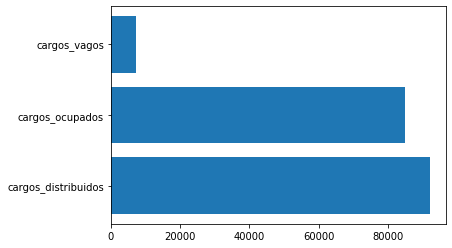

In [ ]:
#definindo as variaveis
Cargos = ["cargos_distribuidos", "cargos_ocupados", "cargos_vagos"]
Valores = [92168, 84894, 7274]

#definindo o formato da plotagem em barra horizontal
plt.barh (Cargos, Valores)
plt.show()

# **PLOTAGEM 2 >> Análise da quantidade de cargos em gráfico de "pizza" quantificando por porcentagem"**

<function matplotlib.pyplot.show>

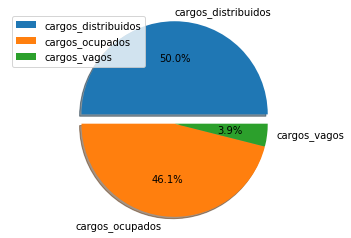

In [ ]:
#defeinindo as variaveis
labels = ["cargos_distribuidos", "cargos_ocupados", "cargos_vagos"]
Cargos = [92168, 84894, 7274]

#define o nível de separabilidade entre as partes
explode = (0.1, 0, 0)

#define o formato de visualização com saída em 1.1%%, sombra e a separação
plt.pie(Cargos, labels=labels, autopct= '%1.1f%%', shadow=True, explode=explode)

#define a legenda 
plt.legend(labels, loc=2)

#define o formato da plotagem (pizza)
plt.axis('equal')

plt.show

# **PLOTAGEM 3 >> Análise da quantidade de cargos por departamento em "barra vertical"**

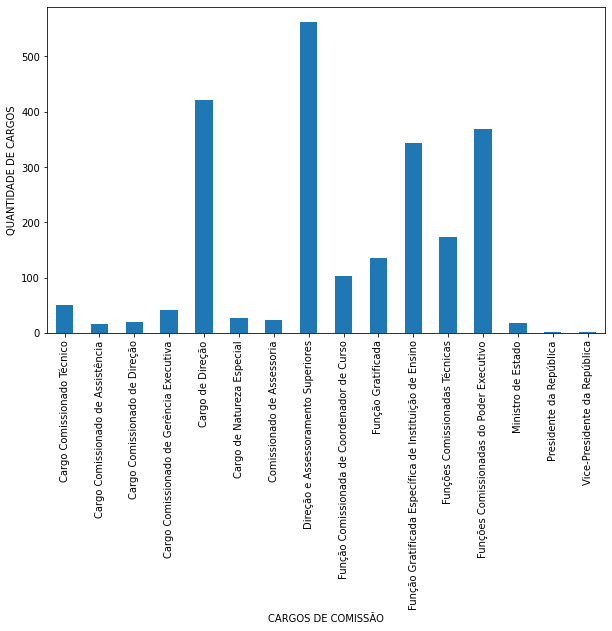

In [ ]:
df.groupby(['sigla_codigo_cargo_comissao']).size().plot.bar(figsize=(10,6),xlabel="CARGOS DE COMISSÃO",ylabel="QUANTIDADE DE CARGOS")